<h1>Introduction</h1>
<p>In this project, I explored Naïve Bayes and implemented a relatively simple spam filter. I used a small data set to train and test the model.</p>

<p>The messages within the dataset have already been classified as spam or ham (not spam).</p>

<p>The implementation of a Naïve Bayes Spam Filter is relatively straightforward using scikit-learn, however, this library hides the implementation details. So, I have not used scikit-learn or similar libraries for this project.</p>

<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

### Formula:
![Formula with explanation](images/formula.png)

### Dataset:
[spam.csv](https://github.com/aadityaamehrotra17/SpamHam/blob/main/spam.csv)

<h3>1.  Read the dataset into a dataframe and explore</h3>

In [1]:
import pandas as pnd
fd = pnd.read_csv('spam.csv', encoding = 'latin-1')
fd = fd.iloc[ :, : -3]
fd.head(20)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<h3>2. Clean the data</h3>

In [2]:
clean = fd.replace(r'[^a-zA-Z\s]', '', regex = True)
clean['v2'] = clean['v2'].str.lower()
clean.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace = True)
clean.head(20)

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling its been weeks now ...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile months or more u r entitled t...


<h3>3. Split the Data</h3>

In [3]:
clean_s = clean.sample(frac = 1, random_state = 40)
train_s = int(len(clean_s) * 0.6)
validation_s = int(len(clean_s) * 0.2)
train_data = clean_s[ : train_s]
validation_data = clean_s[train_s : train_s + validation_s]
test_data = clean_s[train_s + validation_s :]

<h3>4. Create a Word Frequency DataFrame</h3>

In [4]:
s = train_data[train_data['Category'] == 'spam']['Message'].str.split().sum()
h = train_data[train_data['Category'] == 'ham']['Message'].str.split().sum()
s_f = {word : s.count(word) for word in set(s)}
h_f = {word : h.count(word) for word in set(h)}
wf_dict = {}
for i in s + h:
    if i not in wf_dict:
        wf_dict[i] = {'#Spam' : s_f.get(i, 0), '#Ham' : h_f.get(i, 0)}
word_freq = pnd.DataFrame.from_dict(wf_dict, orient = 'index').reset_index().rename(columns={'index' : 'Word'})
word_freq_s = word_freq.sort_values(by = '#Spam', ascending = False)
word_freq.head(15)

,Word,#Spam,#Ham
0,show,3,14
1,ur,90,145
2,colours,1,0
3,euro,2,0
4,offer,17,5
5,get,48,173
6,an,10,48
7,england,6,1
8,flag,5,0
9,lions,2,0


<h3>5. Visualise the Data</h3>

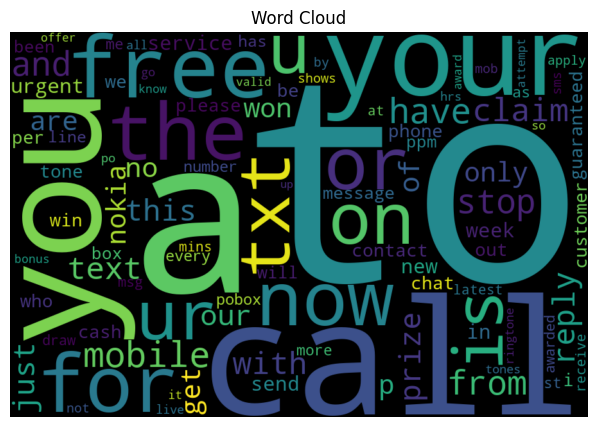

In [5]:
from wordcloud import *
import matplotlib.pyplot as pyp
f = {}
for j in s:
    if j not in f:
        f[j] = 0
    f[j] += 1
wordcloud = WordCloud(width = 900, height = 600, max_words = 100, background_color = 'black')
wordcloud.generate_from_frequencies(f)
pyp.figure(figsize = (10, 5))
pyp.imshow(wordcloud, interpolation = 'bilinear')
pyp.axis('off')
pyp.title('Word Cloud')
pyp.show()

<h3>6.  Calculation

In [6]:
k = 0.5
s_t = sum(train_data['Category'] == 'spam')
h_t = sum(train_data['Category'] == 'ham')
word_prob = word_freq.copy()
word_prob['P(E|S)'] = (word_prob['#Spam'] + k) / ((2 * k) + (s_t))
word_prob['P(E|¬S)'] = (word_prob['#Ham'] + k) / ((2 * k) + (h_t))
word_prob = word_prob.drop(columns=['#Spam', '#Ham'])
word_prob.head(10)

,Word,P(E|S),P(E|¬S)
0,show,0.007709,0.005016
1,ur,0.199339,0.050329
2,colours,0.003304,0.000173
3,euro,0.005507,0.000173
4,offer,0.038546,0.001902
5,get,0.106828,0.060014
6,an,0.023128,0.016776
7,england,0.014317,0.000519
8,flag,0.012115,0.000173
9,lions,0.005507,0.000173


<h3>7. Checking the 'spamliness' of a single word</h3>

In [7]:
sp = 0.2
hp = 0.8
l = 'free'
wi = word_prob[word_prob['Word'] == "free"].index[0]
sg = word_prob.at[wi, 'P(E|S)']
hg = word_prob.at[wi, 'P(E|¬S)']
d = (sg * sp) + (hg * hp)
ge = (sg * sp) / d
eg = 1 - ge
print("Word = " + l)
print("P(E|S) = " + str(sg))
print("P(E|¬S) = " + str(hg))
print("P(S|E) = " + str(ge))
print("P(¬S|E) = " + str(eg))

Word = free
P(E|S) = 0.30947136563876654
P(E|¬S) = 0.011241784849533034
P(S|E) = 0.8731313365813603
P(¬S|E) = 0.12686866341863967


<h3>8. Checking the 'spamliness' of several words</h3>

In [8]:
def cm(m, word_prob, sp, hp):
    ww = m.split()
    tot_s = 1
    tot_h = 1
    for k in ww:
        if k in word_prob['Word'].values:
            g = word_prob[word_prob['Word'] == k].index[0]
            tot_s *= word_prob.at[g, 'P(E|S)']
            tot_h *= word_prob.at[g, 'P(E|¬S)']
    fin_s = (sp * tot_s) / (sp * tot_s + hp * tot_h)
    fin_h = 1 - fin_s
    if fin_s > fin_h:
        return 'spam'
    else:
        return 'ham'
m = 'go until jurong point crazy available only'
c = cm(m, word_prob, sp, hp)
print(c)

spam


<h3>9. Avoiding floating point underflow</h3>

In [9]:
import numpy as pn
word_prob.set_index('Word', inplace=True)
def lg(m, word_prob, sp, hp):
    log_tot_s = pn.log(sp)
    log_tot_h = pn.log(hp)
    for s in m.split():
        if s in word_prob.index:
            log_tot_s += pn.log(word_prob.at[s, 'P(E|S)'])
            log_tot_h += pn.log(word_prob.at[s, 'P(E|¬S)'])
    if log_tot_s > log_tot_h:
        return 'spam'
    else:
        return 'ham'
print(lg(m, word_prob, sp, hp))

spam


<h3>10. Testing the Model</h3>


In [10]:
p = []
for _, gm in test_data.iterrows():
    ra = gm['Message'].split()
    logs = pn.log(sp)
    logh = pn.log(hp)
    for s in ra:
        if s in word_prob.index:
            logs += pn.log(word_prob.at[s, 'P(E|S)'])
            logh += pn.log(word_prob.at[s, 'P(E|¬S)'])
    p.append('spam' if logs > logh else 'ham')
test_data['Predicted'] = p
sm = sum((test_data['Category'] == 'spam') & (test_data['Predicted'] == 'spam'))
hm = sum((test_data['Category'] == 'ham') & (test_data['Predicted'] == 'ham'))
st = sum((test_data['Category'] == 'ham') & (test_data['Predicted'] == 'spam'))
ht = sum((test_data['Category'] == 'spam') & (test_data['Predicted'] == 'ham'))
lpo = sm + hm
ot = sm + hm + st + ht
acc = lpo / ot
print("Correctly classified as spam: " + str(sm))
print("Correctly classified as ham: " + str(hm))
print("Classified as spam but it was ham: " + str(st))
print("Classified as ham but it was spam: " + str(ht))
print("Accuracy: " + str(acc))

Correctly classified as spam: 137
Correctly classified as ham: 867
Classified as spam but it was ham: 107
Classified as ham but it was spam: 4
Accuracy: 0.9004484304932735


C:\Users\Aadityaa\AppData\Local\Temp\ipykernel_8312\3635128975.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = p


<h3>11. Improvements</h3>

In [11]:
class s:
    def __init__(self, a=1, ps=0.01, ph=0.99):
        self.a = a
        self.ps = ps
        self.ph = ph
        self.wp = None
    def t(self, d):
        wf = {}
        for _, r in d.iterrows():
            c = r['Category']
            m = r['Message']
            if isinstance(m, str):
                for w in m.split():
                    if w not in wf:
                        wf[w] = {'spam': 0, 'ham': 0}
                    wf[w][c] += 1
        wfd = pnd.DataFrame(wf).T.reset_index().rename(columns={'index': 'w'})
        sc = d['Category'].value_counts()['spam']
        hc = d['Category'].value_counts()['ham']
        wpd = {}
        for _, r in wfd.iterrows():
            wpd[r['w']] = {
                'P(E|S)': (r['spam'] + self.a) / (sc + 2 * self.a),
                'P(E|¬S)': (r['ham'] + self.a) / (hc + 2 * self.a),
            }
        self.wp = pnd.DataFrame(wpd).T
    def p(self, m):
        if isinstance(m, str):
            pes = peh = 1
            for w in m.split():
                if w in self.wp.index:
                    pes *= self.wp.at[w, 'P(E|S)']
                    peh *= self.wp.at[w, 'P(E|¬S)']
            pse = (pes * self.ps) / ((pes * self.ps) + (peh * self.ph))
            phe = (peh * self.ph) / ((pes * self.ps) + (peh * self.ph))
            return 'spam' if pse > phe else 'ham'
        return None
    def e(self, d):
        cs = ch = is_ = ih = 0
        for _, r in d.iterrows():
            pr = self.p(r['Message'])
            if pr == 'spam':
                if r['Category'] == 'spam':
                    cs += 1
                else:
                    is_ += 1
            else:
                if r['Category'] == 'ham':
                    ch += 1
                else:
                    ih += 1
        ac = (cs + ch) / (cs + ch + is_ + ih)
        print(f"Correctly classified as spam: {cs}")
        print(f"Correctly classified as ham: {ch}")
        print(f"Classified as spam but it was ham: {is_}")
        print(f"Classified as ham but it was spam: {ih}")
        print(f"Accuracy: {ac}")
c = s()
c.t(validation_data)
c.e(validation_data)

Correctly classified as spam: 151
Correctly classified as ham: 824
Classified as spam but it was ham: 137
Classified as ham but it was spam: 2
Accuracy: 0.8752244165170556
